In [1]:
pip install pandas scikit-learn gdown xgboost catboost 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\sdp_dataset.csv', delimiter=";")
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [5]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\sdp_dataset.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
base_models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]

In [6]:
base_model_preds = []
for model in base_models:
    model.fit(X_train_base, y_train_base)
    pred = model.predict(X_train_meta)
    base_model_preds.append(pred)

stacking_dataset = np.column_stack(base_model_preds)
meta_model = LogisticRegression()
meta_model.fit(stacking_dataset, y_train_meta)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.017737
0:	learn: 0.6714269	total: 237ms	remaining: 3m 56s
1:	learn: 0.6509502	total: 263ms	remaining: 2m 11s
2:	learn: 0.6314726	total: 296ms	remaining: 1m 38s
3:	learn: 0.6132714	total: 323ms	remaining: 1m 20s
4:	learn: 0.5955340	total: 346ms	remaining: 1m 8s
5:	learn: 0.5783742	total: 376ms	remaining: 1m 2s
6:	learn: 0.5617929	total: 418ms	remaining: 59.3s
7:	learn: 0.5462661	total: 515ms	remaining: 1m 3s
8:	learn: 0.5313713	total: 557ms	remaining: 1m 1s
9:	learn: 0.5173385	total: 665ms	remaining: 1m 5s
10:	learn: 0.5036462	total: 717ms	remaining: 1m 4s
11:	learn: 0.4907833	total: 769ms	remaining: 1m 3s
12:	learn: 0.4786136	total: 804ms	remaining: 1m 1s
13:	learn: 0.4669410	total: 882ms	remaining: 1m 2s
14:	learn: 0.4554949	total: 919ms	remaining: 1m
15:	learn: 0.4452292	total: 952ms	remaining: 58.5s
16:	learn: 0.4348361	total: 1.01s	remaining: 58.2s
17:	learn: 0.4251907	total: 1.07s	remaining: 58.5s
18:	learn: 0.4159289	total: 1.12s	remaining: 58s
19:	learn: 0

LogisticRegression()

In [7]:
#implementing stacking from previous meta model dataset
holdout_preds = []
for model in base_models:
    pred = model.predict(X_holdout)
    holdout_preds.append(pred)

stacking_holdout_dataset = np.column_stack(holdout_preds)
meta_model_holdout_preds = meta_model.predict(stacking_holdout_dataset)

Accuracy: 92.72%
Precision: 45.45%
Recall: 3.88%
F1score: 7.14%
Roc_auc: 51.76%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1656
           1       0.45      0.04      0.07       129

    accuracy                           0.93      1785
   macro avg       0.69      0.52      0.52      1785
weighted avg       0.90      0.93      0.90      1785



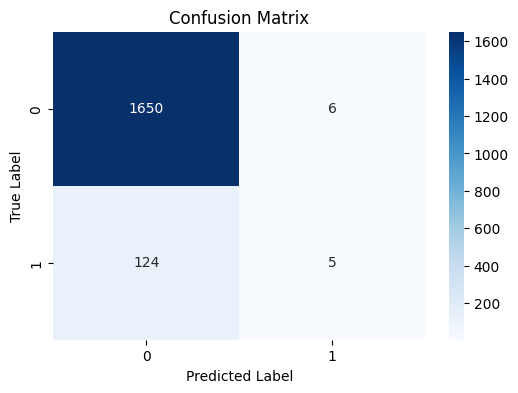

In [8]:
#evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report

accuracy = accuracy_score(y_holdout, meta_model_holdout_preds)
precision = precision_score(y_holdout, meta_model_holdout_preds)
recall = recall_score(y_holdout, meta_model_holdout_preds)
f1score = f1_score(y_holdout, meta_model_holdout_preds)
roc_auc = roc_auc_score(y_holdout, meta_model_holdout_preds)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1score: {f1score*100:.2f}%')
print(f'Roc_auc: {roc_auc*100:.2f}%')
print(classification_report(y_holdout, meta_model_holdout_preds))

# Compute confusion matrix
cm = confusion_matrix(y_holdout, meta_model_holdout_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()